### Problem 1: Handwritten Digits Recognition with K-NN


In [5]:
!pip install idx2numpy

Prepare the data

In [1]:
import gzip
import idx2numpy

TRAIN_IMAGES_PATH = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS_PATH = 'train-labels-idx1-ubyte.gz'

TEST_IMAGES_PATH = 't10k-images-idx3-ubyte.gz'
TEST_LABELS_PATH = 't10k-labels-idx1-ubyte.gz'

def read_data_from_gz(file_path):
    with gzip.open(file_path, 'rb') as f_in:
        file_content = f_in.read()
    data = idx2numpy.convert_from_string(file_content)
    return data

In [2]:

raw_train_images = read_data_from_gz(TRAIN_IMAGES_PATH)
train_labels = read_data_from_gz(TRAIN_LABELS_PATH)
raw_test_images = read_data_from_gz(TEST_IMAGES_PATH)
test_labels = read_data_from_gz(TEST_LABELS_PATH)

print(f'Raw Train Images Shape: {raw_train_images.shape}')
print(f'Raw Test Images Shape: {raw_test_images.shape}')

# Flatten & Normalize => 60000, 28, 28 -> 60000, 784
train_images = raw_train_images.reshape(raw_train_images.shape[0], -1).astype('float32') / 255.0
# Flatten & Normalize => 10000, 28, 28 -> 10000, 784
test_images = raw_test_images.reshape(raw_test_images.shape[0], -1).astype('float32') / 255.0

print(f'Train Images Shape: {train_images.shape}')
print(f'Test Images Shape: {test_images.shape}')
print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Labels Shape: {test_labels.shape}')

Raw Train Images Shape: (60000, 28, 28)
Raw Test Images Shape: (10000, 28, 28)
Train Images Shape: (60000, 784)
Test Images Shape: (10000, 784)
Train Labels Shape: (60000,)
Test Labels Shape: (10000,)


Compute & Store Pairwise Distance

In [3]:
from sklearn.metrics import pairwise_distances
import numpy as np

distance_matrix = pairwise_distances(train_images, test_images, metric='euclidean')
np.save('distance_matrix.npy', distance_matrix)
print(f'Distance Matrix saved to distance_matrix.npy with shape: {distance_matrix.shape}')


Distance Matrix saved to distance_matrix.npy with shape: (60000, 10000)


Implement k-NN for k = 1, 3, 5, 10, 20, 30, 40, 50, 60

In [4]:
import tqdm
from scipy.stats import mode
import numpy as np

k_values = [1, 3, 5, 10, 20, 30, 40, 50, 60]
prediction_accuracies = []
distance_matrix = np.load('distance_matrix.npy')
train_labels = read_data_from_gz(TRAIN_LABELS_PATH)
test_labels = read_data_from_gz(TEST_LABELS_PATH)

# sort the neighbors
sorted_neighbors = np.argsort(distance_matrix, axis=0)

for k in tqdm.tqdm(k_values):
  # find k nearest neighbor(s) after sorting
  nearest_neighbors = sorted_neighbors[:k]
  nearest_neighbors_labels = train_labels[nearest_neighbors]

  # predict based on majority vote
  prediction = mode(nearest_neighbors_labels, axis=0, keepdims=False).mode

  # find accuracy
  accuracy = np.mean(prediction == test_labels)
  prediction_accuracies.append(float(accuracy))
  print(f'for k = {k}, accuracy is: {accuracy}')

100%|██████████| 9/9 [00:00<00:00, 180.59it/s]

for k = 1, accuracy is: 0.9691
for k = 3, accuracy is: 0.9705
for k = 5, accuracy is: 0.9688
for k = 10, accuracy is: 0.9665
for k = 20, accuracy is: 0.9625
for k = 30, accuracy is: 0.9596
for k = 40, accuracy is: 0.956
for k = 50, accuracy is: 0.9534
for k = 60, accuracy is: 0.9517


Plot Accuracy vs k

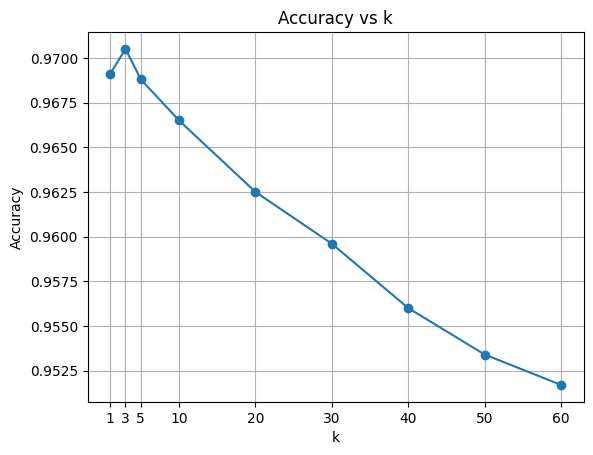

In [5]:
import matplotlib.pyplot as plt

plt.plot(k_values, prediction_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.grid(True)
plt.xticks(k_values)
plt.show()